In [34]:
!pip install yfinance matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 31.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 26.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


### Imports

In [35]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Class definition 

In [38]:
class GeTicker:
    def __init__(self, abbreviation):
        self.abbreviation = abbreviation
        self.ticker = yf.Ticker(self.abbreviation)

    def get_data(self):
        self.data = self.ticker.history(period="1y")
        return self.data

    def plot_stock(self, title=None):
        """Plot OHLC prices with volume on a secondary axis."""
        if not hasattr(self, 'data'):
            raise ValueError("Data not loaded. Call get_data() first.")

        data = self.data
        if title is None:
            title = f"{self.abbreviation} Stock Prices & Volume"

        fig, ax1 = plt.subplots(figsize=(14,7))

        ax1.plot(data.index, data['Open'], label='Open', color='green', linewidth=1)
        ax1.plot(data.index, data['High'], label='High', color='blue', linewidth=1)
        ax1.plot(data.index, data['Low'], label='Low', color='red', linewidth=1)
        ax1.plot(data.index, data['Close'], label='Close', color='black', linewidth=1.5)
        ax1.set_ylabel("Price (USD)")
        ax1.set_title(title)
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        ax2.bar(data.index, data['Volume'], color='grey', alpha=0.3, label='Volume')
        ax2.set_ylabel("Volume")
        ax2.set_ylim(0, data['Volume'].max()*5) 

        plt.show()

### Pfizer

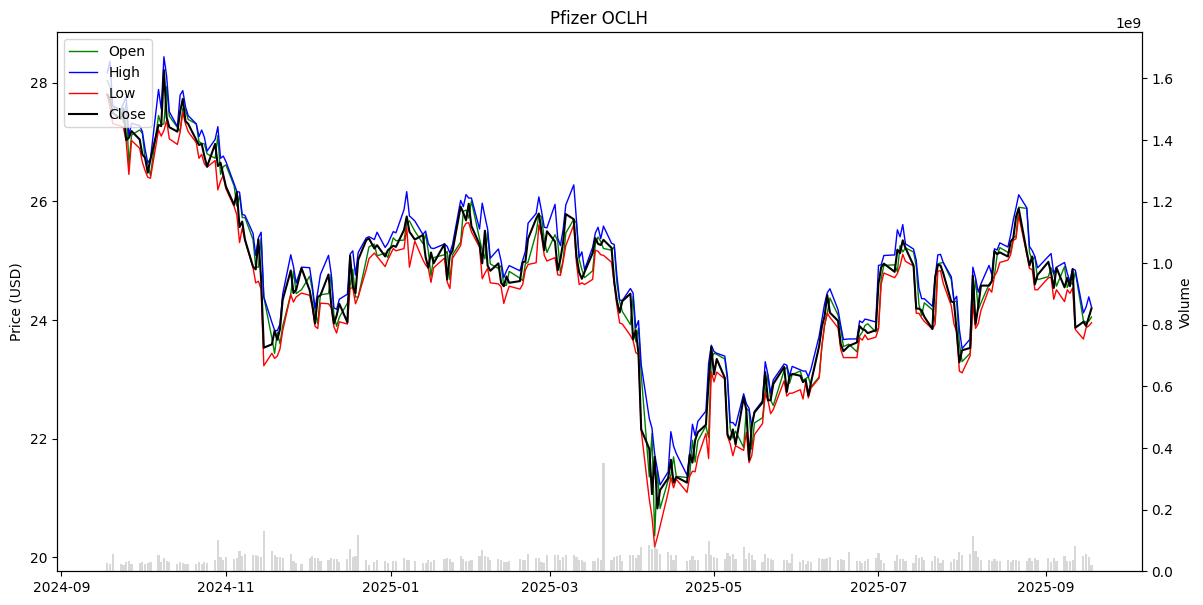

In [39]:
symbol = GeTicker('PFE')
pfizer = symbol.get_data()
symbol.plot_stock(title="Pfizer OCLH")

### EDA

In [25]:
pfizer.info()
# no missing values, expected

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-09-18 00:00:00-04:00 to 2025-09-18 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   High          2515 non-null   float64
 2   Low           2515 non-null   float64
 3   Close         2515 non-null   float64
 4   Volume        2515 non-null   int64  
 5   Dividends     2515 non-null   float64
 6   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


In [26]:
pfizer.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.000000
mean,28.409696,28.682468,28.128332,28.405308,3.022243e+07,0.005760,0.000419
std,6.615819,6.727066,6.513490,6.626315,1.823073e+07,0.045758,0.021017
min,18.038539,18.361680,17.899153,18.095568,5.187683e+06,0.000000,0.000000
25%,23.895539,24.057953,23.681013,23.886269,1.971315e+07,0.000000,0.000000
50%,26.826856,27.079861,26.562876,26.836426,2.593180e+07,0.000000,0.000000
75%,31.041456,31.275115,30.806792,31.058595,3.556100e+07,0.000000,0.000000
max,50.210651,51.130351,49.572664,50.749210,3.499965e+08,0.430000,1.054000


In [27]:
pfizer = pfizer.round(2)
pfizer

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-09-18 00:00:00-04:00,20.58,20.80,20.44,20.44,38735343,0.0,0.0
2015-09-21 00:00:00-04:00,20.60,20.74,20.06,20.17,24985175,0.0,0.0
2015-09-22 00:00:00-04:00,19.90,20.12,19.81,20.07,25600290,0.0,0.0
2015-09-23 00:00:00-04:00,20.05,20.42,20.03,20.30,27534696,0.0,0.0
2015-09-24 00:00:00-04:00,20.14,20.46,19.96,20.35,32109161,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-12 00:00:00-04:00,24.81,24.84,23.84,23.87,81378200,0.0,0.0
2025-09-15 00:00:00-04:00,23.99,24.12,23.68,23.97,50760200,0.0,0.0
2025-09-16 00:00:00-04:00,23.96,24.22,23.87,23.90,57010800,0.0,0.0


In [29]:
pfizer.plot_stock("Pfizer OCLH")

AttributeError: 'DataFrame' object has no attribute 'plot_stock'